# 1.统计出911数据中不同月份电话次数的变化情况

In [2]:
from matplotlib import pyplot as plt
from matplotlib import rc
import pandas as pd
import numpy as np

In [4]:
file_path = './911.csv'

In [7]:
df = pd.read_csv(file_path)
print(df.head(1))

         lat        lng                                               desc  \
0  40.297876 -75.581294  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

       zip                   title            timeStamp          twp  \
0  19525.0  EMS: BACK PAINS/INJURY  2015-12-10 17:10:52  NEW HANOVER   

                     addr  e  
0  REINDEER CT & DEAD END  1  


In [8]:
#把时间字符串设置为索引
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.set_index('timeStamp',inplace=True)
print(df.head(1))

                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

                         zip                   title          twp  \
timeStamp                                                           
2015-12-10 17:10:52  19525.0  EMS: BACK PAINS/INJURY  NEW HANOVER   

                                       addr  e  
timeStamp                                       
2015-12-10 17:10:52  REINDEER CT & DEAD END  1  


In [11]:
count_by_month = df.resample('M').count()['title']
print(count_by_month)

timeStamp
2015-12-31     7916
2016-01-31    13096
2016-02-29    11396
2016-03-31    11059
2016-04-30    11287
2016-05-31    11374
2016-06-30    11732
2016-07-31    12088
2016-08-31    11904
2016-09-30    11669
2016-10-31    12502
2016-11-30    12091
2016-12-31    12162
2017-01-31    11605
2017-02-28    10267
2017-03-31    11684
2017-04-30    11056
2017-05-31    11719
2017-06-30    12333
2017-07-31    11768
2017-08-31    11753
2017-09-30     7276
Freq: M, Name: title, dtype: int64


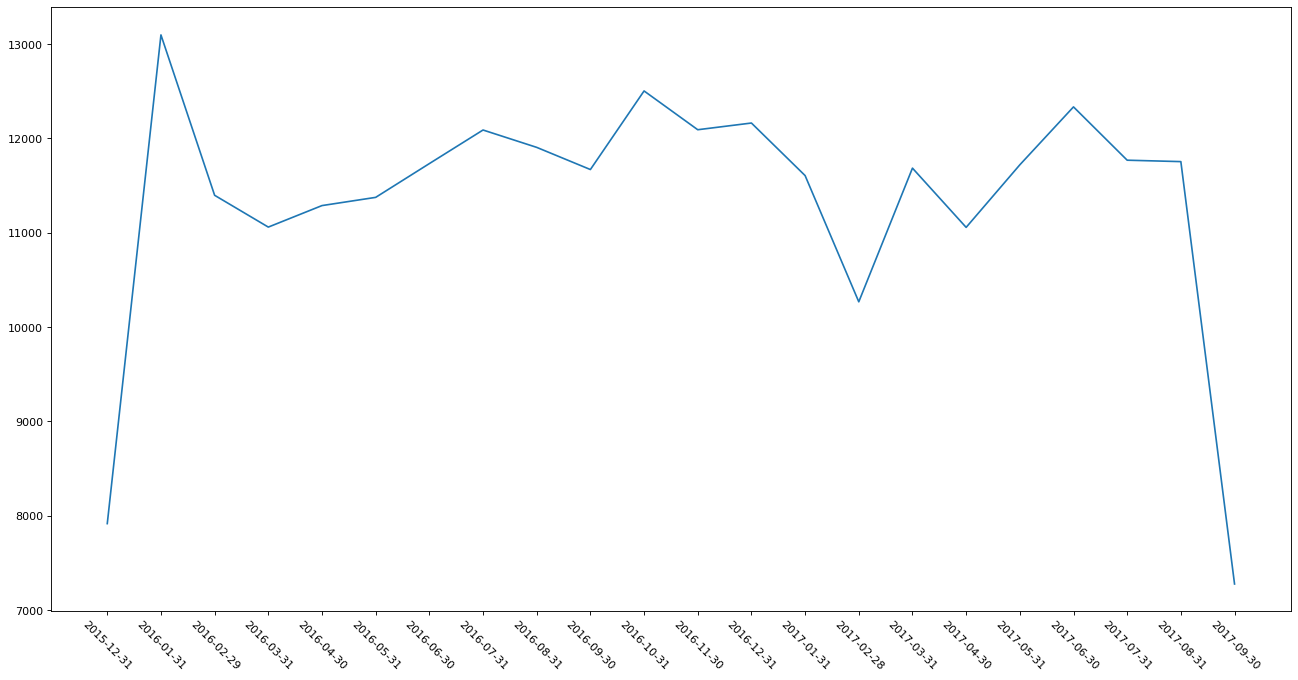

In [14]:
#画图
_x = count_by_month.index
_y = count_by_month.values

_x = [i.strftime('%Y-%m-%d') for i in _x]

plt.figure(figsize = (20,10),dpi = 80)
plt.plot(range(len(_x)),_y)
plt.xticks(range(len(_x)),_x,rotation = 315)
plt.show()

# 2.统计出911数据中不同月份不同类型的电话的次数的变化情况 

In [28]:
df = pd.read_csv(file_path)

#添加列，表示分类
title = df['title'].str.split(': ').tolist()
cate_list = [i[0] for i in title]
df['cate'] = pd.DataFrame(np.array(cate_list).reshape((df.shape[0],1)))
# df['timeStamp'] = pd.to_datetime(df['timeStamp'])
# df.set_index('timeStamp',inplace=True)

In [29]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])
df.set_index('timeStamp',inplace=True)
print(df.head(1))

                           lat        lng  \
timeStamp                                   
2015-12-10 17:10:52  40.297876 -75.581294   

                                                                  desc  \
timeStamp                                                                
2015-12-10 17:10:52  REINDEER CT & DEAD END;  NEW HANOVER; Station ...   

                         zip                   title          twp  \
timeStamp                                                           
2015-12-10 17:10:52  19525.0  EMS: BACK PAINS/INJURY  NEW HANOVER   

                                       addr  e cate  
timeStamp                                            
2015-12-10 17:10:52  REINDEER CT & DEAD END  1  EMS  


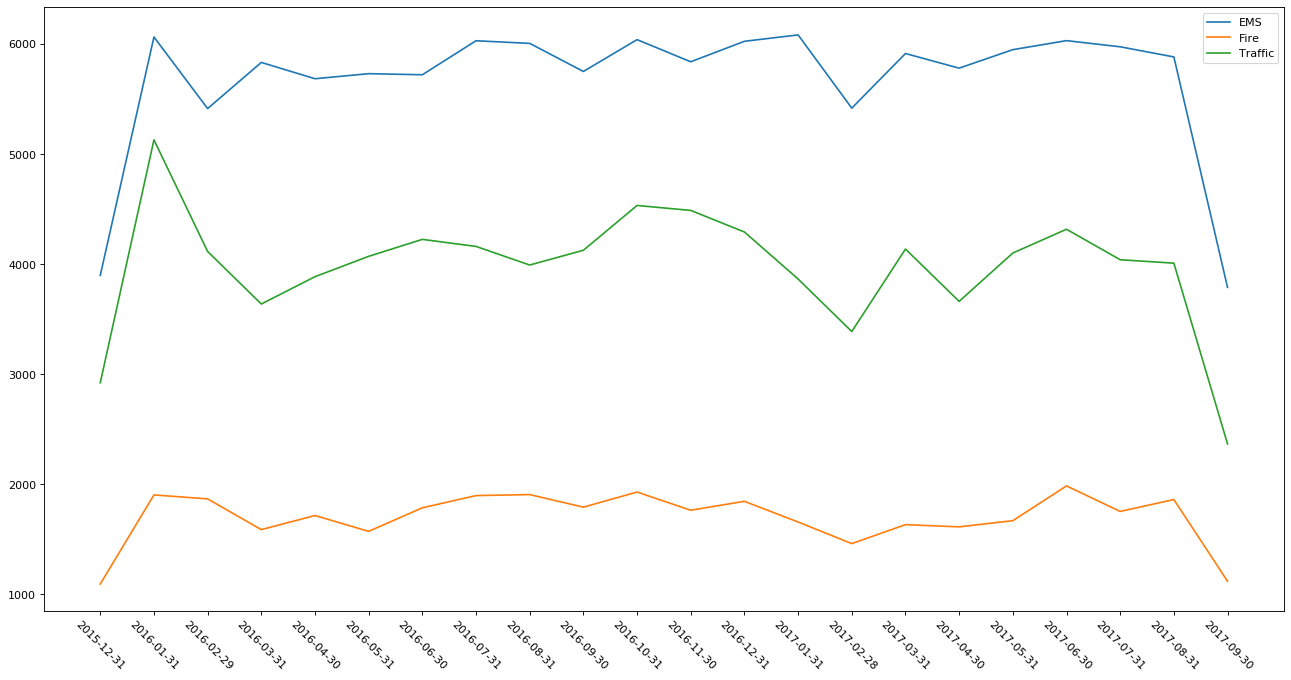

In [25]:
#分组
plt.figure(figsize = (20,10),dpi = 80)
for group_name,group_data in df.groupby(by='cate'):
    #对不同的分类都进行绘图
    count_by_month = group_data.resample('M').count()['title']
    #画图
    _x = count_by_month.index
    _y = count_by_month.values

    _x = [i.strftime('%Y-%m-%d') for i in _x]

    plt.plot(range(len(_x)),_y,label = group_name)
    
plt.xticks(range(len(_x)),_x,rotation = 315)
plt.legend(loc='best')
plt.show()